# Part 1: Example Code for Reading Output File 

* The first part of the notebook shows how to read the output from the fortran code included in this respository.
* The fortran code is the STATSTAR program from Caroll & Ostlie, with the programs/subroutines all merged into one file.


In [2]:
from astropy.io import ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
infile = 'starmodl.dat'
star = ascii.read(infile,comment='#',delimiter=' ')#,format='no_header')#,header=False)

In [4]:
star

r,Qm,L_r,T,P,rho,kap,eps,rad,dlPdlT
float64,float64,float64,float64,float64,float64,float64,str8,str1,float64
4900000000.0,0.99,-5.1e+31,13000000.0,1.3e+17,80.0,2.0,0.97E+01,r,20.6
5600000000.0,0.98,1.3e+32,12000000.0,1.3e+17,78.0,1.9,0.94E+01,r,5.0
6300000000.0,0.97,3.3e+32,12000000.0,1.3e+17,76.0,1.9,0.89E+01,r,3.9
6900000000.0,0.96,5.7e+32,12000000.0,1.2e+17,73.0,2.0,0.82E+01,r,3.5
7600000000.0,0.94,8.2e+32,12000000.0,1.1e+17,71.0,2.0,0.74E+01,r,3.3
8300000000.0,0.92,1.1e+33,12000000.0,1.1e+17,68.0,2.0,0.65E+01,r,3.3
8900000000.0,0.9,1.3e+33,12000000.0,1e+17,65.0,2.1,0.57E+01,r,3.2
9600000000.0,0.88,1.6e+33,11000000.0,9.4e+16,61.0,2.2,0.49E+01,r,3.2
10000000000.0,0.85,1.8e+33,11000000.0,8.7e+16,58.0,2.2,0.41E+01,r,3.2


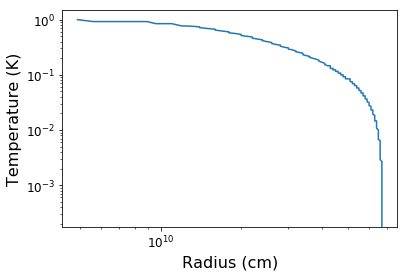

In [6]:
plt.figure(figsize=(6,4))
plt.plot(star['r'],star['T']/max(star['T']),label='Temperature')
plt.xlabel('Radius (cm)',fontsize=16)
plt.ylabel('Temperature (K)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

# Part 2: Running and Reading Output From Python Code

* Python version is here: http://spiff.rit.edu/classes/phys370/lectures/statstar/statstar_python3.py

* The output doesn't comment the beginning parameters, so need to use a separate read statement.

In [27]:
import os
import numpy as np
homedir = os.getenv("HOME")
from astropy.io import ascii
from astropy.table import Table
from matplotlib import pyplot as plt

In [3]:
os.chdir(homedir +"/siena/courses/ASTR392/STATSTAR/")

In [4]:
!ls

starmodl_py.dat statstar.py


In [55]:
%run statstar.py

 Enter the mass of the star (in solar units): 1
 Enter the luminosity of the star (in solar units): .86071
 Enter the effective temperature of the star (in K): 5500.2
 Enter the mass fraction of hydrogen (X): .7
 Enter the mass fraction of metals (Z): .008


CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


In [63]:
!more starmodl_py.datq


A Homogeneous Main-Sequence Model
 The surface conditions are:        The central conditions are:
 Mtot =  1.000000E+00 Msun          Mc/Mtot     =  4.00418E-04
 Rtot =  1.020998E+00 Rsun          Rc/Rtot     =  1.90000E-02
 Ltot =  8.607100E-01 Lsun          Lc/Ltot     =  7.67225E-02
 Teff =  5.500200E+03 K             Density     =  7.72529E+01
 X    =  7.000000E-01               Temperature =  1.41421E+07
 Y    =  2.920000E-01               Pressure    =  1.46284E+17 dynes/cm**2
 Z    =  8.000000E-03               epsilon     =  3.17232E+02 ergs/s/g
                                    dlnP/dlnT   =  2.49808E+00
Notes:
 (1) Mass is listed as Qm = 1.0 - M_r/Mtot, where Mtot =     1.989e+33
 (2) Convective zones are indicated by c, radiative zones by r
 (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is
 labeled by *
   r        Qm       L_r       T        P        rho      kap      eps     dlPdlT
1.35E+09 1.00E+00 2.53E+32 1.40E+07 1.45E+17 7.72E+01 1.40E+00 1.51E+01 c   2.5

In [56]:
infile = "starmodl_py.dat"
colnames = ['r','Qm', 'L_r', 'T', 'P', 'rho', 'kap', 'eps', 'Transport', 'dlPdlT']

In [57]:
star = ascii.read(infile,comment='#',delimiter=' ', data_start=16)

In [58]:
star = Table(star,names = colnames)

In [59]:
star

r,Qm,L_r,T,P,rho,kap,eps,Transport,dlPdlT
float64,float64,float64,float64,float64,float64,float64,float64,str1,float64
1350000000.0,1.0,2.53e+32,14000000.0,1.45e+17,77.2,1.4,15.1,c,2.5
2060000000.0,0.999,2.83e+32,13900000.0,1.43e+17,76.6,1.42,14.6,c,2.5
2770000000.0,0.997,3.4e+32,13800000.0,1.4e+17,75.7,1.44,13.9,c,2.5
3480000000.0,0.993,4.28e+32,13700000.0,1.36e+17,74.5,1.46,13.1,c,2.5
4190000000.0,0.988,5.51e+32,13500000.0,1.32e+17,73.1,1.49,12.1,c,2.5
4900000000.0,0.982,7.06e+32,13300000.0,1.27e+17,71.5,1.53,11.1,c,2.5
5610000000.0,0.973,8.9e+32,13100000.0,1.22e+17,69.7,1.58,10.0,c,2.4
6320000000.0,0.962,1.1e+33,12800000.0,1.16e+17,67.7,1.63,8.87,r,2.5
7030000000.0,0.949,1.32e+33,12500000.0,1.1e+17,65.5,1.7,7.79,r,2.7


In [60]:
convection = star['Transport'] == 'c'
print(f"transition from convection to radiation happens at {np.min(star['r'][convection]):.2e}")

transition from convection to radiation happens at 1.35e+09


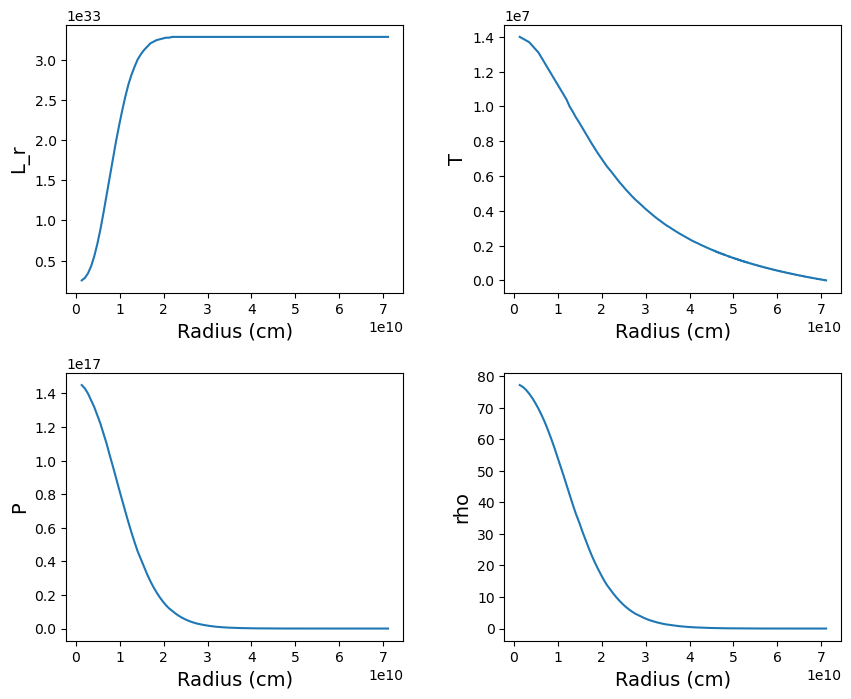

In [61]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=.3,wspace=.3)
yvars = ['L_r', 'T', 'P', 'rho']
for i in range(len(yvars)):
    plt.subplot(2,2,i+1)
    plt.plot(star['r'], star[yvars[i]], label=yvars[i])
    plt.ylabel(yvars[i],fontsize=14)
    plt.xlabel("Radius (cm)",fontsize=14)


### Plotting the Radial Trends Together

Text(0.5, 1.0, 'M=1, L=0.86071, T= 5500.2, X=0.70, Z=0.008')

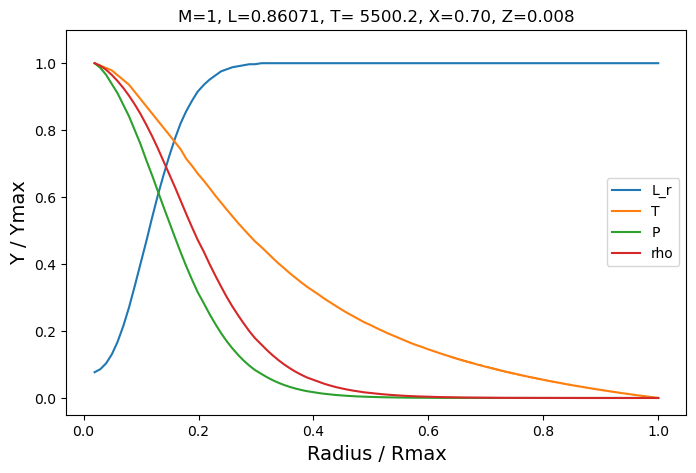

In [66]:
plt.figure(figsize=(8,5))
Rmax =np.max(star['r']) 
yvars = ['L_r', 'T', 'P', 'rho']#,'kap','eps']
for i in range(len(yvars)):
    ymax = np.max(star[yvars[i]])
    plt.plot(star['r']/Rmax, star[yvars[i]]/ymax, label=yvars[i])
    
    plt.xlabel("Radius / Rmax",fontsize=14)
#plt.yscale('log')
plt.ylabel("Y / Ymax",fontsize=14)
#plt.xscale('log')
plt.ylim(-.05,1.1)
plt.legend()
plt.title("M=1, L=0.86071, T= 5500.2, X=0.70, Z=0.008")
